# **Importing Dependencies**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.datasets import cifar10

# **Loading Data**

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
dir(cifar10.load_data())

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index']

In [4]:
(_, y_train), (_, _) = cifar10.load_data()
unique_labels = set(y_train.flatten())

In [5]:
print("Unique labels in CIFAR-10 dataset:")
for label in sorted(unique_labels):
    print(label)

Unique labels in CIFAR-10 dataset:
0
1
2
3
4
5
6
7
8
9


In [6]:
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
len(X_train)

50000

In [8]:
len(X_test)

10000

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

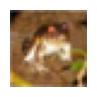

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (1,1))
plt.imshow(X_train[0])
plt.axis('off')
plt.show()


In [11]:
class_label_index = y_train[0][0]

In [12]:
class_label_index

6

# **Scaling**

In [13]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [14]:
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=( 32, 32, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

In [30]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [31]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 62s 78ms/step - loss: 0.4193 - accuracy: 0.8542 - val_loss: 0.9887 - val_accuracy: 0.7141
Epoch 2/10
782/782 [==============================] - 62s 80ms/step - loss: 0.3745 - accuracy: 0.8689 - val_loss: 1.0297 - val_accuracy: 0.7083
Epoch 3/10
782/782 [==============================] - 61s 78ms/step - loss: 0.3305 - accuracy: 0.8850 - val_loss: 1.0573 - val_accuracy: 0.7155
Epoch 4/10
782/782 [==============================] - 60s 77ms/step - loss: 0.2881 - accuracy: 0.9015 - val_loss: 1.1038 - val_accuracy: 0.7173
Epoch 5/10
782/782 [==============================] - 58s 74ms/step - loss: 0.2514 - accuracy: 0.9137 - val_loss: 1.1831 - val_accuracy: 0.7110
Epoch 6/10
782/782 [==============================] - 59s 75ms/step - loss: 0.2179 - accuracy: 0.9240 - val_loss: 1.2418 - val_accuracy: 0.7059
Epoch 7/10
782/782 [==============================] - 61s 78ms/step - loss: 0.1915 - accuracy: 0.9343 - val_loss: 1.3832 - val_accuracy:

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

313/313 [==============================] - 4s 11ms/step - loss: 0.9297 - accuracy: 0.7059


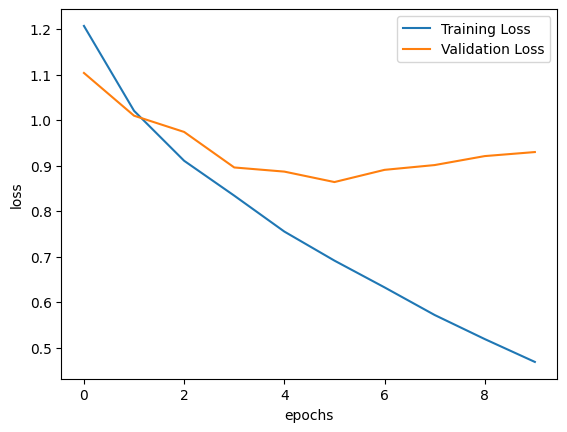

In [23]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

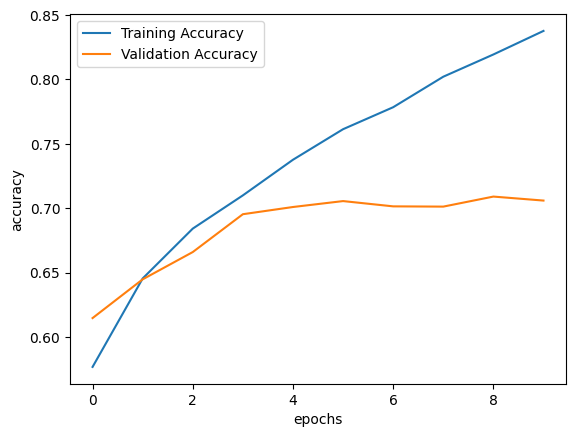

In [24]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()